In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import json
import joblib
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
# Check if TensorFlow is using GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow is not using any GPU.")

TensorFlow is not using any GPU.


In [31]:
df = pd.read_csv("data.csv")
df

C:\Users\gregory.fatouras\AppData\Local\Temp\ipykernel_23888\429624954.py:1: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Name,List,Location,Directory Level 1,Direcetory Level 2,Directory Level 3,Site collection ad++,Site address,Content type,File extension,...,Version number,Never checked in,Created date,Last modified date,Created by,Last modified by,Custom permissions,Anonymous guest link,Organization guest link,Retention label
0,PMC Q3 2024.pptx,Documents,https://fftwealth.sharepoint.com/sites/FundDoc...,FundDocumentation,Shared Documents,c. Pipeline Manager Committee PMC,https://fftwealth.sharepoint.com/sites/FundDoc...,https://fftwealth.sharepoint.com/sites/FundDoc...,Document,pptx,...,64.0,No,9/26/2024,11/7/2024,Payton Lill,Payton Lill,Disabled,NaN,NaN,NaN
1,Quarterly Manager Blurb - 2024.xlsx,Documents,https://fftwealth.sharepoint.com/sites/FundDoc...,FundDocumentation,Shared Documents,w. Coverage & Quarterly Blurbs,https://fftwealth.sharepoint.com/sites/FundDoc...,https://fftwealth.sharepoint.com/sites/FundDoc...,Document,xlsx,...,174.0,No,7/1/2024,11/7/2024,Elliott Barker,Sean Boner,Disabled,NaN,NaN,NaN
2,GTF Exposure Snapshot - Sep 2024.xlsx,Documents,https://fftwealth.sharepoint.com/sites/FundDoc...,FundDocumentation,Shared Documents,m. Portfolio and Risk Analysis,https://fftwealth.sharepoint.com/sites/FundDoc...,https://fftwealth.sharepoint.com/sites/FundDoc...,Document,xlsx,...,5.0,No,11/7/2024,11/7/2024,Polina Kiseleva,Polina Kiseleva,Disabled,NaN,NaN,NaN
3,Janus Henderson Biotechnology Innovation Fund ...,Documents,https://fftwealth.sharepoint.com/sites/FundDoc...,FundDocumentation,Shared Documents,a. Due Diligence,https://fftwealth.sharepoint.com/sites/FundDoc...,https://fftwealth.sharepoint.com/sites/FundDoc...,Document,docx,...,107.0,No,9/12/2024,11/7/2024,Payton Lill,Payton Lill,Disabled,NaN,NaN,NaN
4,2024-11-07-Documents By Last Modified Date.xlsx,Documents,https://fftwealth.sharepoint.com/sites/SharePo...,SharePointMigration,Shared Documents,Reports,https://fftwealth.sharepoint.com/sites/SharePo...,https://fftwealth.sharepoint.com/sites/SharePo...,Document,xlsx,...,3.0,No,11/7/2024,11/7/2024,Sabre Admin,Sabre Admin,Disabled,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedStrings.xml,Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,GlobalShare,Shares,Shared Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,https://fftwealth.sharepoint.com/sites/GlobalS...,Document,xml,...,1.0,No,12/31/1979,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,Disabled,NaN,NaN,NaN
588218,styles.xml,Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,GlobalShare,Shares,Shared Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,https://fftwealth.sharepoint.com/sites/GlobalS...,Document,xml,...,1.0,No,12/31/1979,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,Disabled,NaN,NaN,NaN
588219,vbaProject.bin,Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,GlobalShare,Shares,Shared Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,https://fftwealth.sharepoint.com/sites/GlobalS...,Document,bin,...,1.0,No,12/31/1979,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,Disabled,NaN,NaN,NaN
588220,.rels,Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,GlobalShare,Shares,Shared Documents,https://fftwealth.sharepoint.com/sites/GlobalS...,https://fftwealth.sharepoint.com/sites/GlobalS...,Document,rels,...,1.0,No,12/31/1979,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,Disabled,NaN,NaN,NaN


In [32]:
df = df.drop(["Directory Level 1","Direcetory Level 2","Directory Level 3",'Anonymous guest link', 'Organization guest link', 'Retention label','Checked out To','Custom permissions'],axis=1)
df = df.drop(["Site collection ad++",'Content type',"Site address","Approval status","Checked out status","Version number","Never checked in", "Last modified date", 'List',],axis=1)
df

,Name,Location,File extension,Size (MB),Total size for all versions (MB),Created date,Created by,Last modified by
0,PMC Q3 2024.pptx,https://fftwealth.sharepoint.com/sites/FundDoc...,pptx,2.35,154.51,9/26/2024,Payton Lill,Payton Lill
1,Quarterly Manager Blurb - 2024.xlsx,https://fftwealth.sharepoint.com/sites/FundDoc...,xlsx,0.37,58.71,7/1/2024,Elliott Barker,Sean Boner
2,GTF Exposure Snapshot - Sep 2024.xlsx,https://fftwealth.sharepoint.com/sites/FundDoc...,xlsx,0.09,0.47,11/7/2024,Polina Kiseleva,Polina Kiseleva
3,Janus Henderson Biotechnology Innovation Fund ...,https://fftwealth.sharepoint.com/sites/FundDoc...,docx,2.36,274.49,9/12/2024,Payton Lill,Payton Lill
4,2024-11-07-Documents By Last Modified Date.xlsx,https://fftwealth.sharepoint.com/sites/SharePo...,xlsx,7.85,24.22,11/7/2024,Sabre Admin,Sabre Admin
...,...,...,...,...,...,...,...,...
588217,sharedStrings.xml,https://fftwealth.sharepoint.com/sites/GlobalS...,xml,0.35,0.35,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators
588218,styles.xml,https://fftwealth.sharepoint.com/sites/GlobalS...,xml,0.08,0.08,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators
588219,vbaProject.bin,https://fftwealth.sharepoint.com/sites/GlobalS...,bin,0.27,0.27,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators
588220,.rels,https://fftwealth.sharepoint.com/sites/GlobalS...,rels,0.01,0.01,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators


In [33]:
#df = df.head(30000)

In [34]:
#df= df.sample(n=50000, random_state=42)

In [40]:
# Function to split the URL into directory levels and exclude the file name
def split_url_to_columns(url, max_levels=10):
    # Split the URL starting from '/sites/'
    url_parts = url.split('/sites/', 1)[-1]  # Get everything after '/sites/'
    
    # Now split by '/' to get each directory level, and remove the file name
    parts = url_parts.split('/')
    
    # Remove the last part (the file name)
    file_name = parts[-1]
    parts = parts[:-1]
    
    # Ensure there are exactly max_levels columns, pad with NaN if fewer levels
    columns = parts[:max_levels]  # Get the first 'max_levels' parts
    columns += [np.nan] * (max_levels - len(columns))  # Pad with NaN if there are fewer levels
    
    # If there are more than max_levels, concatenate the rest into a new column
    if len(parts) > max_levels:
        remaining_parts = '/'.join(parts[max_levels:])
        extra_column = f'Directory Level {max_levels + 1}'
        return columns, remaining_parts
    
    return columns, None  # Return None if no extra levels

# Loop through the DataFrame and apply the function to the 'Location' column
new_columns = [f'Directory Level {i+1}' for i in range(10)]
expanded_columns = df['Location'].apply(split_url_to_columns)

# Convert the result into a DataFrame and assign it to the original DataFrame
df[new_columns] = pd.DataFrame([item[0] for item in expanded_columns], index=df.index)
df['Directory Level n'] = [item[1] for item in expanded_columns]

data_processed = df.copy()

# Export the copied DataFrame as 'data_processed.csv'
data_processed.to_csv("data_processed.csv", index=False)

# Show the resulting DataFrame
print(df["Directory Level 3"].value_counts().head(30))

Directory Level 3
Shared Documents                         306346
Shares                                   160923
a. Due Diligence                          59135
r. Archive                                 6560
masterpage                                 6336
e. Trading                                 3640
m. Portfolio and Risk Analysis             3419
q. Marketing                               2852
fftwealth.sharepoint.com                   2772
theme                                      1729
General                                     987
wp                                          815
b. Manager Selection Committee MSC          683
fftwealth-my.sharepoint.com                 587
Business Management                         555
d. Investment Committee                     412
Jordyn Ballegeer - One Drive Files          380
Kaitlyn Malloy - One Drive Files            363
Service Providers                           347
h. Manager Conferences and Cap Intros       341
g. Client Allocations 

In [11]:
df = df.drop(["Location", "Total size for all versions (MB)"],axis=1)

In [12]:
df.isna().sum()

Name                       2
File extension        116559
Size (MB)                  0
Created date               0
Created by                 0
Last modified by           0
Directory Level 1          0
Directory Level 2          0
Directory Level 3      25838
Directory Level 4      28144
Directory Level 5      51453
Directory Level 6      71474
Directory Level 7     174164
Directory Level 8     263554
Directory Level 9     363028
Directory Level 10    508247
Directory Level n     554724
dtype: int64

In [13]:
df = df.fillna('')

In [14]:
columns_to_drop = [f"Directory Level {i}" for i in range(4, 11)]
df = df.drop(columns=columns_to_drop)
df = df.drop(["Directory Level n"],axis=1)
df

,Name,File extension,Size (MB),Created date,Created by,Last modified by,Directory Level 1,Directory Level 2,Directory Level 3
0,PMC Q3 2024.pptx,pptx,2.35,9/26/2024,Payton Lill,Payton Lill,FundDocumentation,Shared Documents,c. Pipeline Manager Committee PMC
1,Quarterly Manager Blurb - 2024.xlsx,xlsx,0.37,7/1/2024,Elliott Barker,Sean Boner,FundDocumentation,Shared Documents,w. Coverage & Quarterly Blurbs
2,GTF Exposure Snapshot - Sep 2024.xlsx,xlsx,0.09,11/7/2024,Polina Kiseleva,Polina Kiseleva,FundDocumentation,Shared Documents,m. Portfolio and Risk Analysis
3,Janus Henderson Biotechnology Innovation Fund ...,docx,2.36,9/12/2024,Payton Lill,Payton Lill,FundDocumentation,Shared Documents,a. Due Diligence
4,2024-11-07-Documents By Last Modified Date.xlsx,xlsx,7.85,11/7/2024,Sabre Admin,Sabre Admin,SharePointMigration,Shared Documents,Reports
...,...,...,...,...,...,...,...,...,...
588217,sharedStrings.xml,xml,0.35,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare,Shares,Shared Documents
588218,styles.xml,xml,0.08,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare,Shares,Shared Documents
588219,vbaProject.bin,bin,0.27,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare,Shares,Shared Documents
588220,.rels,rels,0.01,12/31/1979,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare,Shares,Shared Documents


In [15]:
df['Target'] = df['Directory Level 1'] + " > " + df['Directory Level 2'] + " > " + df['Directory Level 3']

In [16]:
df = df.drop(columns=['Directory Level 1', 'Directory Level 2', 'Directory Level 3', 'Created date'])

In [17]:
# Combine the remaining columns into a single input text field
df['Input'] = (
    "Name: " + df['Name'] +
    ", File extension: " + df['File extension'] +
    ", Size: " + df['Size (MB)'].astype(str) +
    ", Created by: " + df['Created by'] +
    ", Last modified by: " + df['Last modified by']
)
df

,Name,File extension,Size (MB),Created by,Last modified by,Target,Input
0,PMC Q3 2024.pptx,pptx,2.35,Payton Lill,Payton Lill,FundDocumentation > Shared Documents > c. Pipe...,"Name: PMC Q3 2024.pptx, File extension: pptx, ..."
1,Quarterly Manager Blurb - 2024.xlsx,xlsx,0.37,Elliott Barker,Sean Boner,FundDocumentation > Shared Documents > w. Cove...,"Name: Quarterly Manager Blurb - 2024.xlsx, Fil..."
2,GTF Exposure Snapshot - Sep 2024.xlsx,xlsx,0.09,Polina Kiseleva,Polina Kiseleva,FundDocumentation > Shared Documents > m. Port...,"Name: GTF Exposure Snapshot - Sep 2024.xlsx, F..."
3,Janus Henderson Biotechnology Innovation Fund ...,docx,2.36,Payton Lill,Payton Lill,FundDocumentation > Shared Documents > a. Due ...,Name: Janus Henderson Biotechnology Innovation...
4,2024-11-07-Documents By Last Modified Date.xlsx,xlsx,7.85,Sabre Admin,Sabre Admin,SharePointMigration > Shared Documents > Reports,Name: 2024-11-07-Documents By Last Modified Da...
...,...,...,...,...,...,...,...
588217,sharedStrings.xml,xml,0.35,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare > Shares > Shared Documents,"Name: sharedStrings.xml, File extension: xml, ..."
588218,styles.xml,xml,0.08,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare > Shares > Shared Documents,"Name: styles.xml, File extension: xml, Size: 0..."
588219,vbaProject.bin,bin,0.27,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare > Shares > Shared Documents,"Name: vbaProject.bin, File extension: bin, Siz..."
588220,.rels,rels,0.01,BUILTIN\Administrators,BUILTIN\Administrators,GlobalShare > Shares > Shared Documents,"Name: .rels, File extension: rels, Size: 0.01,..."


In [18]:
# Keep only Input and Target columns
df = df[['Input', 'Target']]
df

,Input,Target
0,"Name: PMC Q3 2024.pptx, File extension: pptx, ...",FundDocumentation > Shared Documents > c. Pipe...
1,"Name: Quarterly Manager Blurb - 2024.xlsx, Fil...",FundDocumentation > Shared Documents > w. Cove...
2,"Name: GTF Exposure Snapshot - Sep 2024.xlsx, F...",FundDocumentation > Shared Documents > m. Port...
3,Name: Janus Henderson Biotechnology Innovation...,FundDocumentation > Shared Documents > a. Due ...
4,Name: 2024-11-07-Documents By Last Modified Da...,SharePointMigration > Shared Documents > Reports
...,...,...
588217,"Name: sharedStrings.xml, File extension: xml, ...",GlobalShare > Shares > Shared Documents
588218,"Name: styles.xml, File extension: xml, Size: 0...",GlobalShare > Shares > Shared Documents
588219,"Name: vbaProject.bin, File extension: bin, Siz...",GlobalShare > Shares > Shared Documents
588220,"Name: .rels, File extension: rels, Size: 0.01,...",GlobalShare > Shares > Shared Documents


In [19]:
# Define file path and folder
folder_path = "production_model"
tokenizer_file = os.path.join(folder_path, "tokenizer")

# Check if the folder exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Check if tokenizer exists
if os.path.exists(tokenizer_file):
    print(f"Tokenizer already exists at: {tokenizer_file}")
else:
    print("Tokenizer not found. Creating and saving a new tokenizer...")

    # Load tokenizer and process the dataset
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

    # Save the tokenizer to the production_model folder
    tokenizer.save_pretrained(folder_path)

    print(f"Tokenizer saved to: {folder_path}")

Tokenizer not found. Creating and saving a new tokenizer...
Tokenizer saved to: production_model


In [20]:
import pickle
# Split data into input (X) and target (y)
X = df['Input']
y = df['Target']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the input text
max_vocab_size = 10000  # Maximum number of words in the vocabulary
max_sequence_length = 100  # Maximum length of a sequence
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Set embedding dimensionality
embedding_dim = 100  # Typical value; adjust based on your model or experiment
# Save the tokenizer
with open(os.path.join(folder_path, "tokenizer.pkl"), 'wb') as f:
    pickle.dump(tokenizer, f)

In [21]:
# Define the file path for the saved model
model_path = "production_model/model.h5"

# Check if the model already exists
if os.path.exists(model_path):
    print("Model found. Loading the existing model...")
    model = load_model(model_path)
else:
    print("Model not found. Training a new model...")
    
    # Define the CNN model
    embedding_dim = 100  # Dimensionality of the embedding layer
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
        
        # First Convolutional Layer
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),  # Max pooling to reduce dimensionality after convolution

        # Second Convolutional Layer
        Conv1D(filters=64, kernel_size=5, activation='relu'),  # Reduced number of filters
        MaxPooling1D(pool_size=2),  # Max pooling again for further dimensionality reduction

        # Third Convolutional Layer
        Conv1D(filters=32, kernel_size=3, activation='relu'),  # Further reduction in filters
        MaxPooling1D(pool_size=2),

        # Global Max Pooling
        GlobalMaxPooling1D(),  # This replaces the need for dense layer pooling

        # Fully Connected Layer
        Dense(128, activation='relu'),  # Fewer neurons compared to the earlier model
        Dropout(0.4),  # Dropout for regularization

        # Another Fully Connected Layer
        Dense(64, activation='relu'),
        Dropout(0.4),  # Another layer of dropout

        # Output Layer
        Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=5E-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    batch_size = 512
    epochs = 20
    history = model.fit(
        X_train_padded, y_train,
        validation_data=(X_test_padded, y_test),
        batch_size=batch_size,
        epochs=epochs
    )

    # Save the trained model
    print("Training complete. Saving the model...")
    model.save(model_path)



Model found. Loading the existing model...


In [22]:
# Paths for saving components
model_path = "production_model/model.h5"
tokenizer_file = "production_model/tokenizer.pkl"
label_encoder_file = "production_model/labels.pkl"
labels_file = "production_model/labels.txt"
config_file = "production_model/config.json"
history_file = "production_model/history.json"  # File to save model training history

# Ensure production folder exists
os.makedirs("production_model", exist_ok=True)

# 1. Save the trained model
print("Saving the trained model...")
model.save(model_path)

# 2. Save the tokenizer
print("Saving the tokenizer...")
with open(tokenizer_file, "wb") as f:
    joblib.dump(tokenizer, f)

# 3. Save the LabelEncoder
print("Saving the LabelEncoder...")
joblib.dump(label_encoder, label_encoder_file)

# 4. Save the labels to a text file
print("Saving the labels...")
with open(labels_file, "w") as f:
    for label in label_encoder.classes_:
        f.write(label + "\n")

# 5. Save training configuration
print("Saving the training configuration...")
config = {
    "max_sequence_length": max_sequence_length,
    "vocab_size": vocab_size,
    "embedding_dim": embedding_dim,
    "learning_rate": 5E-5,
    "batch_size": 512,
    "epochs": 20
}
with open(config_file, "w") as f:
    json.dump(config, f)

# 6. Save the model training history
if 'history' in globals() or 'history' in locals():  # Check if history exists
    print("Saving the training history...")
    with open(history_file, "w") as f:
        json.dump(history.history, f)
else:
    print("No training history found. Skipping history saving.")

print("All components saved successfully in the 'production_model' folder.")


Saving the trained model...
Saving the tokenizer...
Saving the LabelEncoder...
Saving the labels...
Saving the training configuration...
No training history found. Skipping history saving.
All components saved successfully in the 'production_model' folder.


3677/3677 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8197 - loss: 0.4378
Test Accuracy: 0.82


NameError: name 'history' is not defined

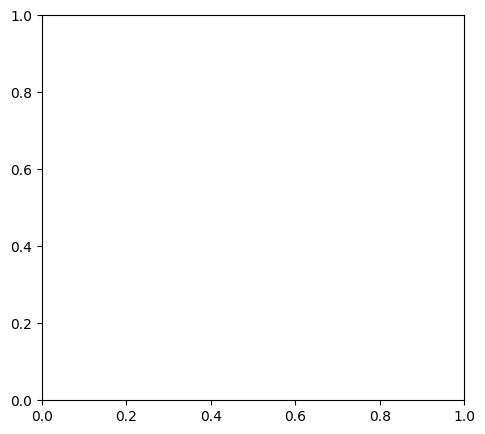

In [23]:
# Recompile model (if necessary)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# Step 1: Select 10 random file names and their corresponding actual labels
random_indices = np.random.choice(len(X_test), 10, replace=False)
random_file_names = X_test.iloc[random_indices]  # X_test is a pandas DataFrame
actual_labels = y_test[random_indices]  # y_test is a numpy array, so we use simple indexing

# Step 2: Tokenize the random file names (just like training data)
random_file_seq = tokenizer.texts_to_sequences(random_file_names)
random_file_padded = pad_sequences(random_file_seq, maxlen=max_sequence_length, padding='post')

# Step 3: Make predictions with the trained model
y_pred_probs = model.predict(random_file_padded)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Step 4: Decode the predictions and actual labels back to the original directory paths
predicted_directory_paths = label_encoder.inverse_transform(y_pred_classes)
actual_directory_paths = label_encoder.inverse_transform(actual_labels)

# Step 5: Print the file names, predicted directory paths, and actual directory paths
for i in range(10):
    print(f"File Name: {random_file_names.iloc[i]}")
    print(f"Predicted Directory Path: {predicted_directory_paths[i]}")
    print(f"Actual Directory Path: {actual_directory_paths[i]}")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
File Name: Name: FFT for Mark Consuelos--June 13, 2017.pdf, File extension: pdf, Size: 0.5, Created by: Laurence G. Gillston, Last modified by: Laurence G. Gillston
Predicted Directory Path: GlobalShare > Shares > Shared Documents
Actual Directory Path: GlobalShare > Shares > Shared Documents
--------------------------------------------------
File Name: Name: Dynamic Alpha Weekly Update 2018-05-11.msg, File extension: msg, Size: 0.11, Created by: Arnold Rozenvasser, Last modified by: AlphaBeta
Predicted Directory Path: FundDocumentation > Shared Documents > a. Due Diligence
Actual Directory Path: FundDocumentation > Shared Documents > a. Due Diligence
--------------------------------------------------
File Name: Name: PSG - 1.2021 FOS Statement - US Core.pdf, File extension: pdf, Size: 0.04, Created by: Natalie B. Green, Last modified by: Natalie B. Green
Predicted Directory Path: GlobalShare > Shares > Shared Documents
Actual Directory Path: Globa

In [25]:
# Step 1: Get predicted probabilities for the test set
y_pred_probs = model.predict(X_test_padded)

# Step 2: Get the predicted class and confidence
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted classes
y_pred_confidences = np.max(y_pred_probs, axis=1)  # Confidence of the predicted classes

# Step 3: Identify predictions with confidence > 90%
high_confidence_indices = y_pred_confidences > 0.9

# Step 4: Compare these predictions to the true labels
correct_high_confidence = np.sum(y_pred_classes[high_confidence_indices] == y_test[high_confidence_indices])

# Step 5: Output the result
print(f"Number of correct predictions with over 90% confidence: {correct_high_confidence}")

3677/3677 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Number of correct predictions with over 90% confidence: 61644


# Notes
Predicts Dir1/Dir2/Dir3 location with 82% accuracy, given:
- File Name
- Created By
- Last Modified By
- Size (MB)

Correctly predicts location with >90% confidence 10% of the time

Fewer directory levels = higher accuracy

